<h3>IMPORT SOME NECESSARY LIBRARIES</h3>

In [89]:
import pandas as pd # data processing, CSV, Excel file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Matlab-style plotting
import seaborn as sns # data visualization 
import plotly.express as px # graphing library
import cufflinks as cf # third-party wrapper library around Plotly
cf.go_offline()
%matplotlib inline  

<h3>IMPORT DATASETS</h3>

In [90]:
df_train = pd.read_excel('Data_Train.xlsx') # training dataset
df_test  = pd.read_excel('Data_Test.xlsx') # testing dataset

In [91]:
datasets = [df_train, df_test]

In [92]:
df_train.shape, df_test.shape # (Rows, Columns) in dataset

((6237, 9), (1560, 8))

In [93]:
df_train.head() # showing first 5 rows of dataset

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [94]:
df_train.info() # getting general info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [95]:
df_train.nunique() # showing unique elements 

Title           5568
Author          3679
Edition         3370
Reviews           36
Ratings          342
Synopsis        5549
Genre            345
BookCategory      11
Price           1614
dtype: int64

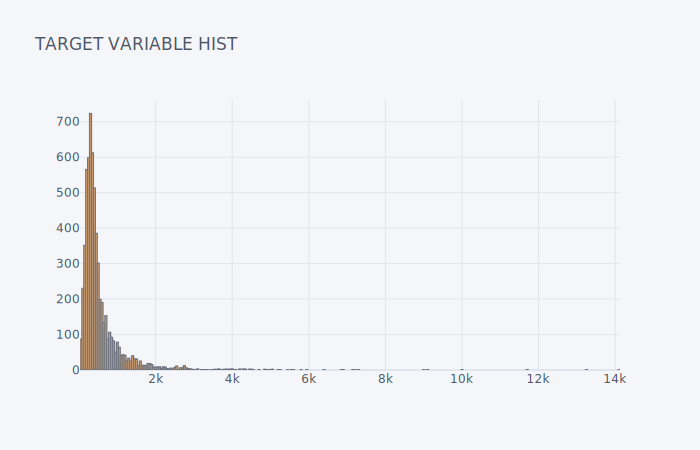

In [96]:
import plotly.io as pio
pio.renderers.default = "svg"
fig1 = df_train['Price'].iplot(kind='histogram', title='TARGET VARIABLE HIST')

<h3>DATA PREPROCESSING</h3>

In [97]:
# extracting numeric data from ratings and reviews columns and storing them in 'new' columns
for df in datasets:
    df['newRatings'] = df['Ratings'].apply(lambda x : x.split()[0])
    df['newRatings'] = df['newRatings'].apply(lambda x : x.replace(',','')) 
    df['newRatings'] = df['newRatings'].astype('int') # changing the datatype

In [98]:
for df in datasets:
    df['newReviews'] = df['Reviews'].apply(lambda x : x.split()[0])
    df['newReviews'] = df['newReviews'].astype('float')

In [99]:
for df in datasets:
    df['Edition1'] = df['Edition'].apply(lambda x: x.split(',–')[0])
    df['Date'] = df['Edition'].apply(lambda x: x.split(',–')[1])

In [100]:
# using labeling library for labeling genres and book type
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()

In [101]:
for df in datasets:   
    df['bookCategoryLabel'] = num.fit_transform(df['BookCategory'])
    df['genreLabel'] = num.fit_transform(df['Genre'])
    df['edition1Label'] = num.fit_transform(df['Edition1'])

In [102]:
# checking head again
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,newRatings,newReviews,Edition1,Date,bookCategoryLabel,genreLabel,edition1Label
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,8,4.0,Paperback,10 Mar 2016,0,1,12
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,3.9,Paperback,7 Nov 2012,2,74,12
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,6,4.8,Paperback,25 Feb 1982,6,193,12
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,4.1,Paperback,5 Oct 2017,5,92,12
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,1,5.0,Hardcover,10 Oct 2006,1,253,7


<h3>EXPLORATORY DATA ANALYSIS</h3>

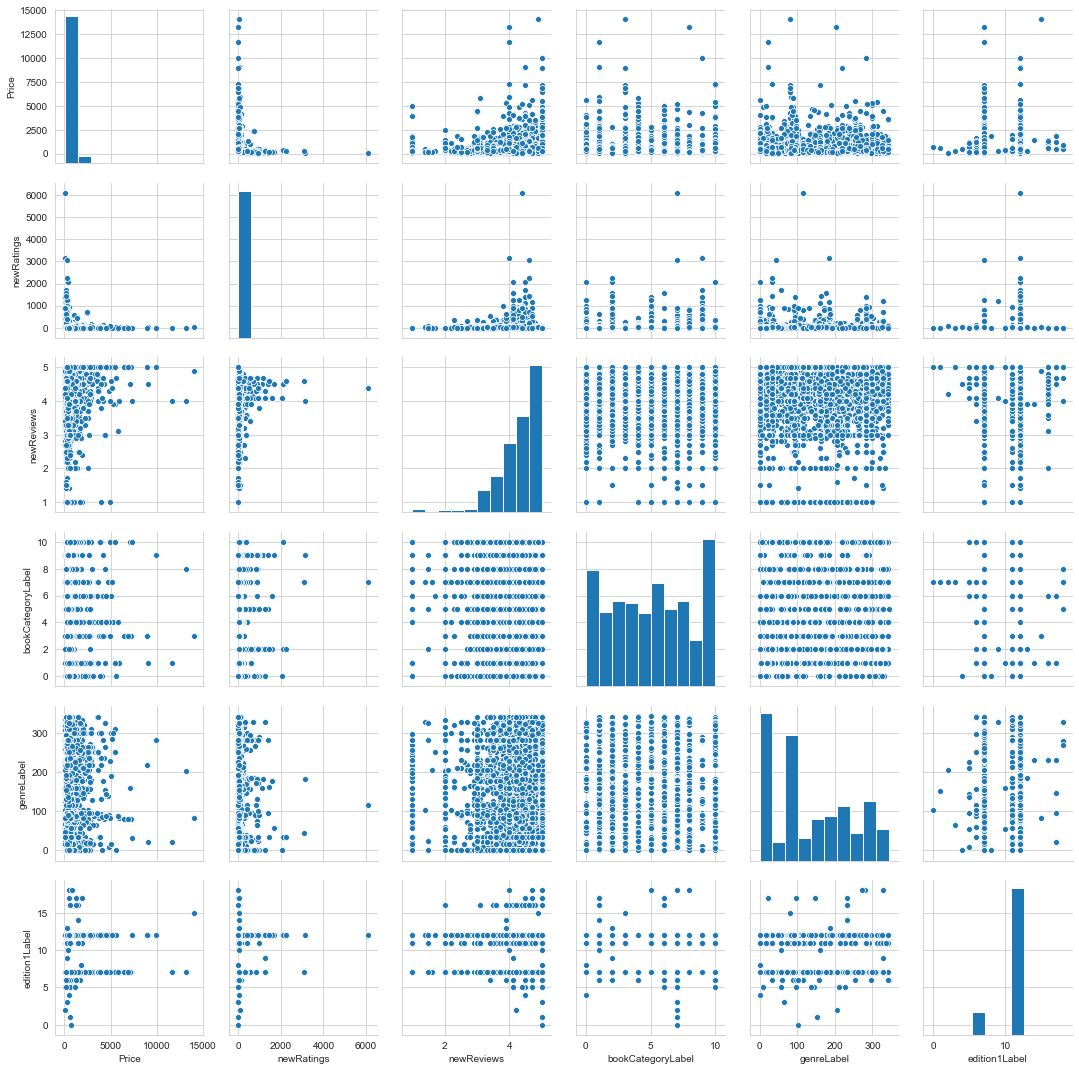

In [103]:
# types of rationship across all the dataset
sns.set_style('whitegrid')
sns.pairplot(df_train)

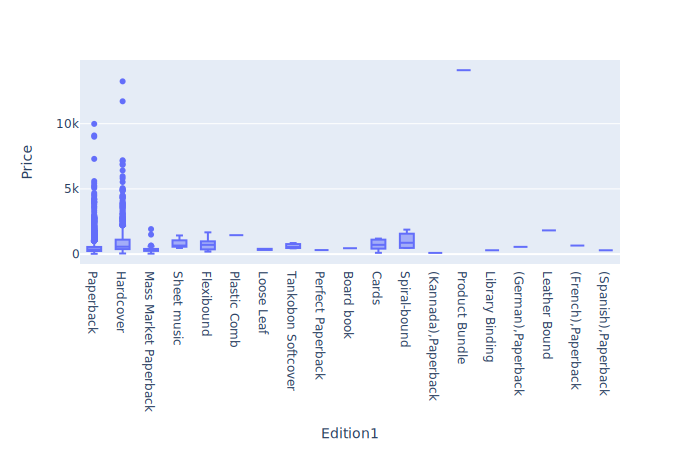

In [104]:
px.box(x='Edition1', y='Price', data_frame=df_train)

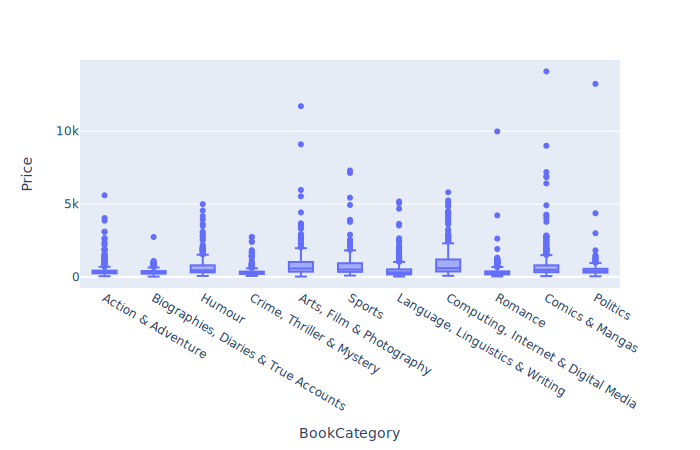

In [105]:
px.box(x='BookCategory', y='Price', data_frame=df_train)

(20, 35.5)

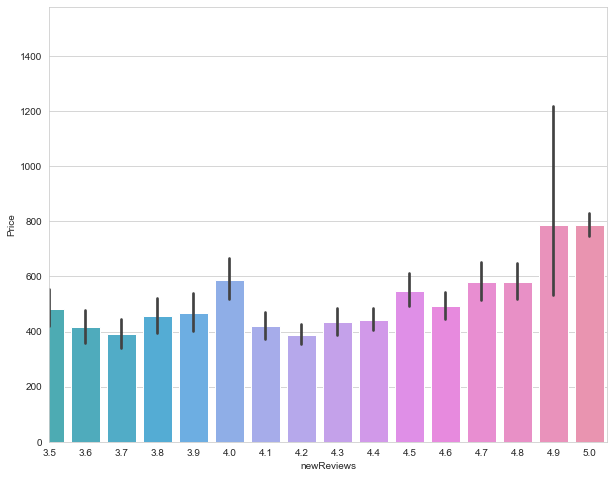

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(x='newReviews', y='Price', data=df_train)
plt.xlim(20)
# As rating increases price increases
# Basically, the books which are more poplular have high rating and price

<h3>BUILD MODEL</h3>

In [107]:
# taking all numerical data 
X_train = df_train[['newRatings', 'newReviews', 'edition1Label', 'bookCategoryLabel', 
                    'genreLabel', 'edition1Label']]

y_train = df_train['Price']

In [108]:
# standardization of training dataset
from sklearn.preprocessing import StandardScaler 

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_train_features = scaler.transform(X_train)

In [110]:
scaled_train_features

array([[-0.18658305, -0.44260333,  0.39032076, -1.46017334, -1.30218992,
         0.39032076],
       [-0.14657852, -0.59355848,  0.39032076, -0.82907247, -0.59947659,
         0.39032076],
       [-0.1999179 ,  0.76503793,  0.39032076,  0.43312927,  0.5460424 ,
         0.39032076],
       ...,
       [-0.21992016, -0.74451364,  0.39032076,  1.37978058,  1.4027751 ,
         0.39032076],
       [-0.21325274, -1.19737911,  0.39032076, -1.46017334, -1.30218992,
         0.39032076],
       [-0.22658759, -0.59355848,  0.39032076, -1.46017334, -1.30218992,
         0.39032076]])

In [111]:
# ml model for prediction
from sklearn.linear_model import LinearRegression

In [112]:
lm = LinearRegression()

In [113]:
lm.fit(scaled_train_features, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# now, again standardization of testing dataset
X_test = df_test[['newRatings', 'newReviews', 'edition1Label', 'bookCategoryLabel', 
                    'genreLabel', 'edition1Label']]
scaler.fit(X_test)
scaled_test_features = scaler.transform(X_test)

In [115]:
scaled_test_features

array([[ 5.62952917,  0.14022265, -0.46218192,  0.10266644,  1.36675394,
        -0.46218192],
       [-0.19853051,  1.03918433,  0.44020081, -0.20533288,  0.99671002,
         0.44020081],
       [-0.18029883,  1.03918433,  0.44020081,  1.33466373,  1.3098241 ,
         0.44020081],
       ...,
       [-0.1742216 , -0.45908513,  0.44020081,  0.41066576,  0.42741168,
         0.44020081],
       [-0.18637605, -1.20821986,  0.44020081, -0.82133153,  1.77949523,
         0.44020081],
       [-0.19245328,  0.2900496 ,  0.44020081,  0.71866509, -0.24151387,
         0.44020081]])

In [116]:
# Now predicting the prices of books from test dataset using trained model
pred = lm.predict(scaled_test_features)

In [117]:
final = pd.DataFrame(data=pred, columns=['Price'])

In [118]:
final

,Price
0,433.744438
1,638.838778
2,613.200112
3,556.173687
4,534.698014
...,...
1555,562.904006
1556,418.424975
1557,488.384886
1558,553.304559


In [119]:
# Saving the file for submission
final.to_excel('Submission.xlsx', index=False)